In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import pandas_profiling as pp
from scipy.stats import norm

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

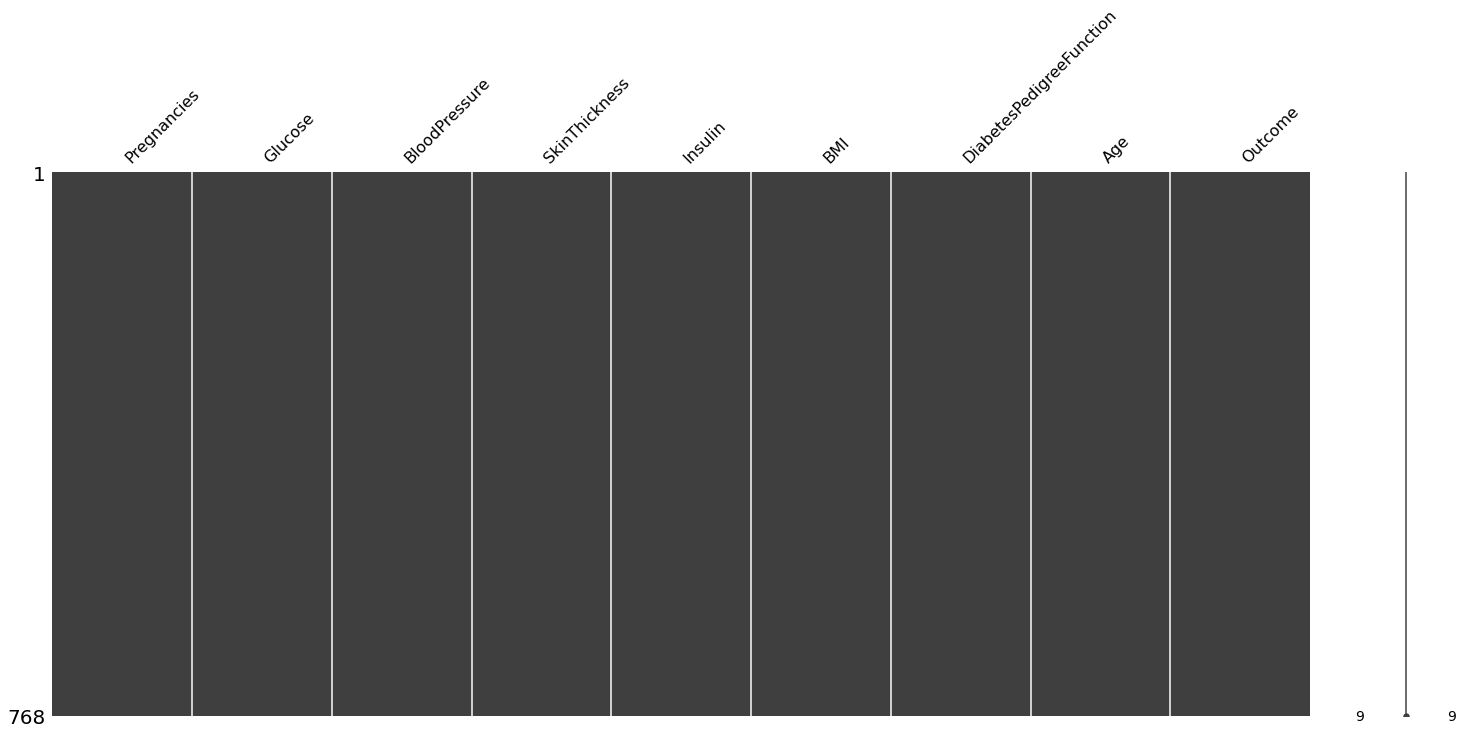

In [5]:
msn.matrix(df)

In [6]:
# no missing values

In [7]:
# some features need to do transformation

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

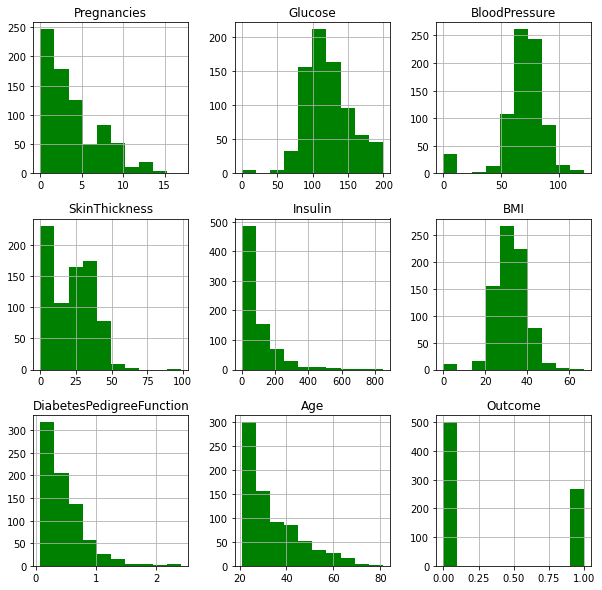

In [9]:
df.hist(figsize = (10,10), color = "green")

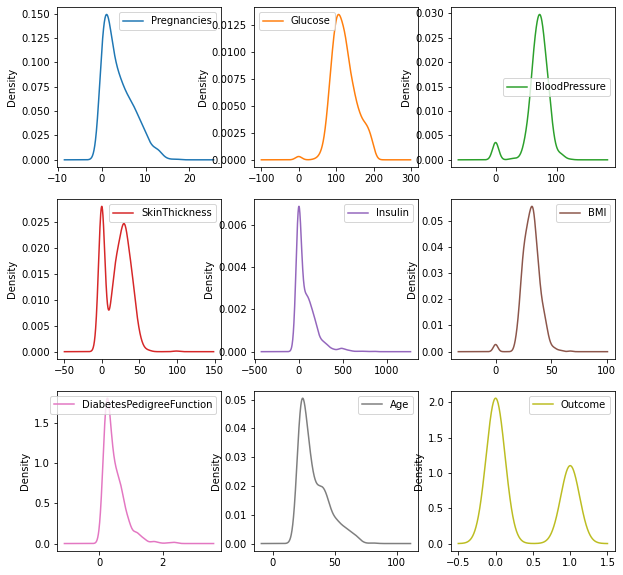

In [10]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(10,10))
plt.show()

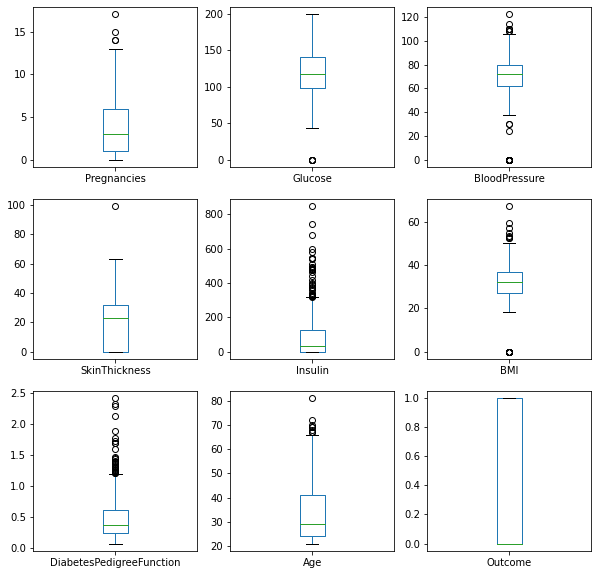

In [11]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()

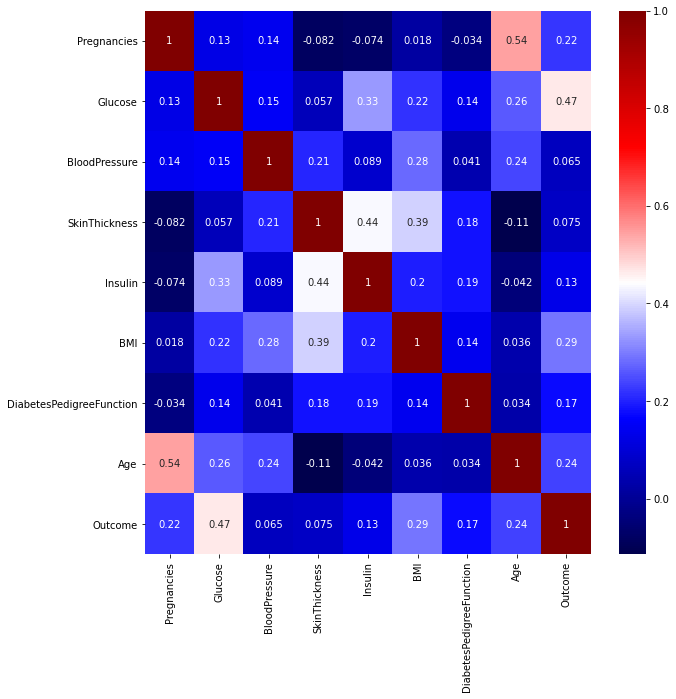

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

In [14]:
# no much correlated features

In [15]:
#BMI has the most efffect to outcome according to heatmap

NameError: name 'pyplot' is not defined

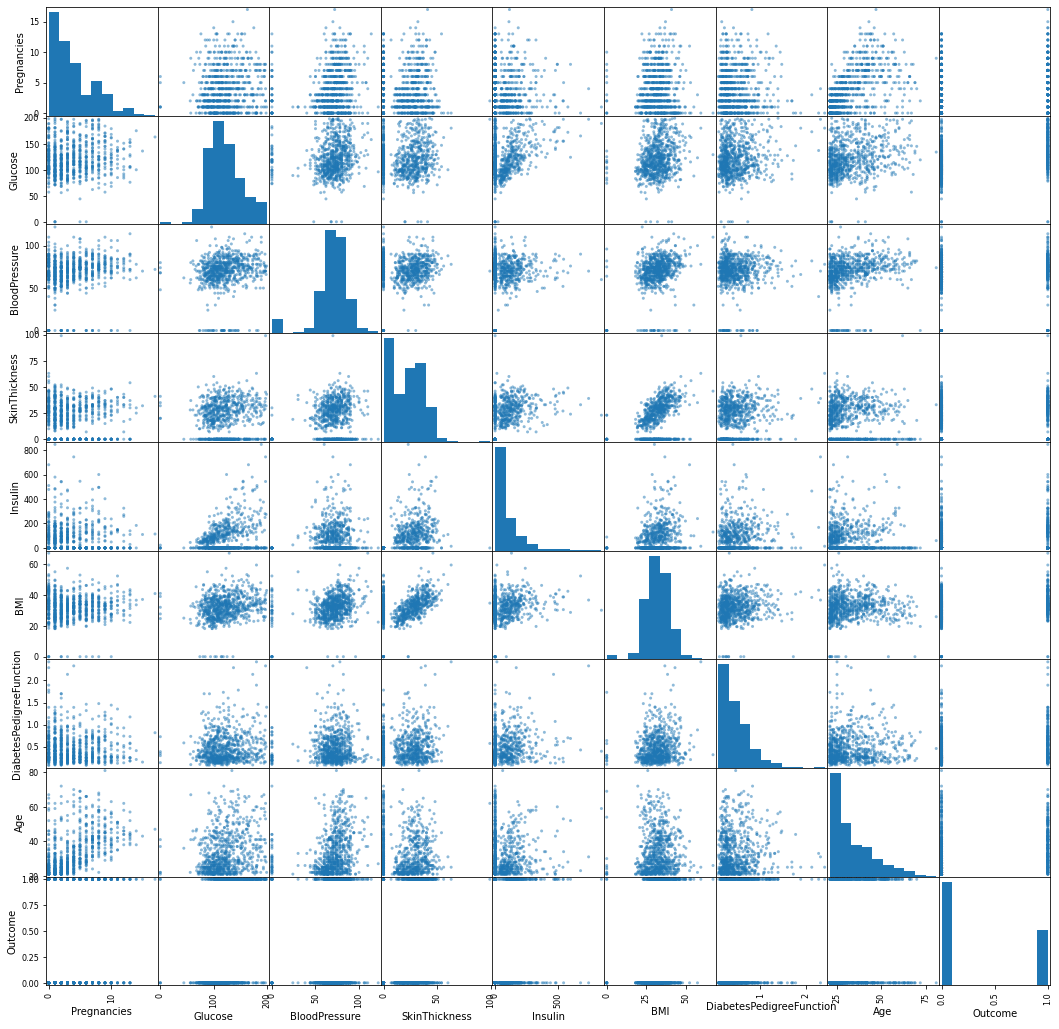

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df ,figsize = (18,18))
pyplot.show()

In [29]:
# conclusion
# data set has not missing values but it has zeoro values which not suit to data set
# skinthickness have very low correlation with target.. we can drop it and it has over 29% zeros
# insulin has 49% zeros ..like missing vaues so we have to drop it also

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
df1 = df.copy()

In [23]:
df1['Glucose'] = df1['Glucose'].apply(lambda x: df1['Glucose'].mean() if x== 0 else x)

<AxesSubplot:>

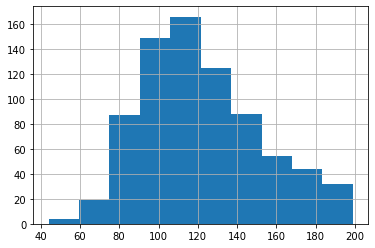

In [24]:
df1['Glucose'].hist()

In [25]:
df1['BloodPressure'] = df1['BloodPressure'].apply(lambda x: df1['BloodPressure'].mean() if x== 0 else x)

<AxesSubplot:>

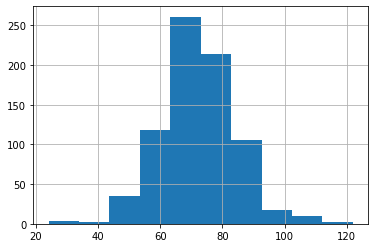

In [26]:
df1['BloodPressure'].hist()

In [27]:
df1['BMI'] = df1['BMI'].apply(lambda x: df1['BMI'].mean() if x== 0 else x)

<AxesSubplot:>

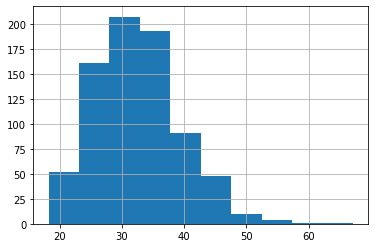

In [28]:
df1['BMI'].hist()